In [ ]:
#If needed, depending on where this code will be run, please run:

#pip install pandas
#pip insall numpy
#pip install matplotlib
#pip install seaborn
#pip install plotly
#pip install textblob


In [7]:
import pandas as pd
import numpy as np
import plotly.express as px

# Loading the dataset and preliminary steps

In [8]:
movies = pd.read_csv('films.csv', on_bad_lines='skip')  # skips lines with parsing errors
movies.head()

,rank,film_title,film_year,overall_rating,language,genre,mpaa_rating,director,actors,plot_summary
0,1,The Shawshank Redemption,1994,3.5,English,Drama,R,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","A young banker named Andy, has his life change..."
1,2,Fight Club,1999,3.3,English,Drama/Crime,R,David Fincher,"Edward Norton, Brad Pitt, Helena Bonham Carter...",An average thirty-something office worker gets...
2,3,The Godfather,1972,3.5,English,Drama/Crime,R,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Robert D...",An organized crime leader gives up control of ...
3,4,The Dark Knight,2008,3.4,English,Action/Adventure,PG-13,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Batman raises the stakes in his war on crime. ...
4,5,Pulp Fiction,1994,3.4,English,Crime/Drama,R,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Bruce Willis...",A story of four interweaving stories developin...


## Checking data types

In [9]:
movies.dtypes

rank                int64
film_title         object
film_year           int64
overall_rating    float64
language           object
genre              object
mpaa_rating        object
director           object
actors             object
plot_summary       object
dtype: object

## Checking null values

In [10]:
movies.isnull().sum()

rank               0
film_title         0
film_year          0
overall_rating     0
language           1
genre              0
mpaa_rating        2
director           0
actors             4
plot_summary      39
dtype: int64

The null values have been spot checked and that information is actually missing from the website, indicating that there is no issue - as it seems - with the scraper itself. Those null values will be excluded when/if needed later on during the analysis

## Checking duplicate rows

In [11]:
movies.duplicated().sum()

np.int64(0)

## Formatting/cleaning of relevant features and general feature information

As multiple actors, directors or genres are together in the same column, it is convenient to use list comprehension so that insights can be explored more effectively (for example looking at actors that worked together, exploring different combinations of genres over time etc.). As actors have missing values, a condition will be included to return an empty list in that case

In [12]:
movies['genre'] = [x.split('/') for x in movies['genre']]
movies['director'] = [x.split(',' ) for x in movies['director']]
movies['actors'] = [x.split(',') if pd.notna(x) else [] for x in movies['actors']]

In [13]:
movies.head(20)

,rank,film_title,film_year,overall_rating,language,genre,mpaa_rating,director,actors,plot_summary
0,1,The Shawshank Redemption,1994,3.5,English,[Drama],R,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, W...","A young banker named Andy, has his life change..."
1,2,Fight Club,1999,3.3,English,"[Drama, Crime]",R,[David Fincher],"[Edward Norton, Brad Pitt, Helena Bonham Car...",An average thirty-something office worker gets...
2,3,The Godfather,1972,3.5,English,"[Drama, Crime]",R,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Robe...",An organized crime leader gives up control of ...
3,4,The Dark Knight,2008,3.4,English,"[Action, Adventure]",PG-13,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart...",Batman raises the stakes in his war on crime. ...
4,5,Pulp Fiction,1994,3.4,English,"[Crime, Drama]",R,[Quentin Tarantino],"[John Travolta, Samuel L. Jackson, Bruce Wil...",A story of four interweaving stories developin...
5,6,Forrest Gump,1994,3.3,English,"[Drama, Comedy]",PG-13,[Robert Zemeckis],"[Tom Hanks, Robin Wright Penn, Gary Sinise, ...","A ""slow"" man explains to people he meets on a ..."
6,7,Lord of the Rings: The Fellowship of the Ring,2001,3.3,English,"[Adventure, Fantasy]",PG-13,[Peter Jackson],"[Elijah Wood, Ian McKellen, Viggo Mortensen,...",A Hobbit by the name of Frodo is entrusted wit...
7,8,Lord of the Rings: The Return of the King,2003,3.4,English,"[Adventure, Fantasy]",PG-13,[Peter Jackson],"[Elijah Wood, Viggo Mortensen, Ian McKellen,...","Frodo and Sam try to destroy ""the one ring"" wh..."
8,9,The Matrix,1999,3.2,English,"[Sci-Fi, Action]",R,"[Lana Wachowski, Lilly Wachowski]","[Keanu Reeves, Carrie-Anne Moss, Laurence Fi...","A computer programmer, Neo, finds that things ..."
9,10,Schindler's List,1993,3.4,English,"[Drama, Biography]",R,[Steven Spielberg],"[Liam Neeson, Ben Kingsley, Ralph Fiennes, ...",Schindler (played by Liam Neeson) tries to sav...


We will now check how many unique actors, directors, films 

In [14]:
flattened_actors = movies.explode('actors')
unique_actors = flattened_actors['actors'].dropna().drop_duplicates()
flattened_directors = movies.explode('director')
unique_directors = flattened_directors['director'].dropna().drop_duplicates()
n_films = movies['film_title'].nunique()
print(f"Number of films: {n_films}")
print(f"Number of unique directors: {len(unique_directors)}")
print(f"Number of unique actors: {len(unique_actors)}")






Number of films: 999
Number of unique directors: 601
Number of unique actors: 4099


1000 films have been scraped but 999 are returned as unique. This will now be checked to ensure there are no errors or inconsistencies

In [15]:
duplicate_titles = movies['film_title'].value_counts()
duplicate_titles = duplicate_titles[duplicate_titles > 1]
print(duplicate_titles)


film_title
True Grit    2
Name: count, dtype: int64


In [16]:
duplicate_titles_df = movies[movies['film_title'].isin(duplicate_titles.index)]
duplicate_titles_df

,rank,film_title,film_year,overall_rating,language,genre,mpaa_rating,director,actors,plot_summary
298,299,True Grit,2010,3.1,English,"[Drama, Western]",PG-13,"[Ethan Coen, Joel Coen]","[Matt Damon, Jeff Bridges, Josh Brolin, Bar...",The Coen Brothers' take on the classic western...
672,673,True Grit,1969,3.0,English,"[Adventure, Western]",G,[Henry Hathaway],"[John Wayne, Glen Campbell, Kim Darby, Robe...",A grizzled and often-times drunk U.S. Marshal ...


It seems like True Grit has had two productions within the timespan of approximately 40 years with different directors and actors. There was no error in the scraping and this is the only duplicate film title.
Unique mpaa ratings will now be checked.

In [17]:
movies.mpaa_rating.value_counts()

mpaa_rating
R        414
PG       200
PG-13    191
NR       148
G         44
NC-17      1
Name: count, dtype: int64

For the purpose of this analysis, an additional feature can be engineered with the meaning of the mpaa_rating as per [Wikipedia](https://en.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system). The category will be assigned to a dictionary with the corresponding mpaa_code to then engineer another categorical column.


In [18]:
mpaa_ratings_dict = {
    'G': 'General Audience',
    'PG': 'Parental Guidance Suggested',
    'PG-13': 'Parents Strongly Cautioned',
    'R': 'Restricted',
    'NC-17': 'Adults Only'
}

In [19]:
movies['mpaaa_cat'] = movies['mpaa_rating'].map(mpaa_ratings_dict)
movies.head()


,rank,film_title,film_year,overall_rating,language,genre,mpaa_rating,director,actors,plot_summary,mpaaa_cat
0,1,The Shawshank Redemption,1994,3.5,English,[Drama],R,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, W...","A young banker named Andy, has his life change...",Restricted
1,2,Fight Club,1999,3.3,English,"[Drama, Crime]",R,[David Fincher],"[Edward Norton, Brad Pitt, Helena Bonham Car...",An average thirty-something office worker gets...,Restricted
2,3,The Godfather,1972,3.5,English,"[Drama, Crime]",R,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Robe...",An organized crime leader gives up control of ...,Restricted
3,4,The Dark Knight,2008,3.4,English,"[Action, Adventure]",PG-13,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart...",Batman raises the stakes in his war on crime. ...,Parents Strongly Cautioned
4,5,Pulp Fiction,1994,3.4,English,"[Crime, Drama]",R,[Quentin Tarantino],"[John Travolta, Samuel L. Jackson, Bruce Wil...",A story of four interweaving stories developin...,Restricted


It is possible to engineer an additional feature to compute how old is  the film, as film_year is available.

In [20]:
movies['film_age'] = 2025 - movies['film_year']

In [21]:
movies.head()

,rank,film_title,film_year,overall_rating,language,genre,mpaa_rating,director,actors,plot_summary,mpaaa_cat,film_age
0,1,The Shawshank Redemption,1994,3.5,English,[Drama],R,[Frank Darabont],"[Tim Robbins, Morgan Freeman, Bob Gunton, W...","A young banker named Andy, has his life change...",Restricted,31
1,2,Fight Club,1999,3.3,English,"[Drama, Crime]",R,[David Fincher],"[Edward Norton, Brad Pitt, Helena Bonham Car...",An average thirty-something office worker gets...,Restricted,26
2,3,The Godfather,1972,3.5,English,"[Drama, Crime]",R,[Francis Ford Coppola],"[Marlon Brando, Al Pacino, James Caan, Robe...",An organized crime leader gives up control of ...,Restricted,53
3,4,The Dark Knight,2008,3.4,English,"[Action, Adventure]",PG-13,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart...",Batman raises the stakes in his war on crime. ...,Parents Strongly Cautioned,17
4,5,Pulp Fiction,1994,3.4,English,"[Crime, Drama]",R,[Quentin Tarantino],"[John Travolta, Samuel L. Jackson, Bruce Wil...",A story of four interweaving stories developin...,Restricted,31


# General distribution of numerical features

The dataset is now better suited for analysis. Some insights will now be gathered with regards to the numerical columns (film_year, film_age and overall_rating). 

In [22]:
numerical_columns = ['film_year', 'film_age', 'overall_rating']
movies[numerical_columns].describe()


,film_year,film_age,overall_rating
count,1000.000000,1000.000000,1000.000000
mean,1991.624000,33.376000,3.119000
std,24.067985,24.067985,0.130675
min,1902.000000,0.000000,2.800000
25%,1975.000000,13.000000,3.000000
50%,1999.000000,26.000000,3.100000
75%,2012.000000,50.000000,3.200000
max,2025.000000,123.000000,3.600000


In [23]:
for col in numerical_columns:
    fig = px.box(movies, y = col, points='all')
    fig.show()


From the boxplots and descriptives above, a few insights can be gathered from this data:

- There are 1000 different films (and we know that True Grit is present twice as it had a remake)

- The average film year is 1991, meaning, as also the film_age variable suggests, that on average, films in this dataset are approx. 30 years old, however, as confirmed by the boxplot and the median value of 1999, there is a long tail of older films (that lowers the mean) indicating that overall there is a prevalence of films that are newer as 50% of the films released in - or after - 1999. The variability in years is also high as suggested by the standard deviation of approx. 24 years. The same discussion applies to the film_age variable as it was engineered from the year variable. 

- The dataset contains a rich variety of film ages with the most recent films produced 1 year ago (min) and the olderst film produced 123 years ago, in 1902

- The ratings range from 2.8 to 3.6 out of 5 stars and the reason for this is unclear as filmcrave lists these as the top 1000 movies of all times so it would be expected that at least some of the films would near that figure in terms of ratings (like 4.8 or at least above 4). Possible reasons for this might be that selection of the top movies of all times was based on factors that filmcrave selected (such as cultural impact, popularity) and then user rating (which is likely this feature) is affected by factors like central tendency bias - by which on a scale, people tend to rate in the middle. In terms of general descriptives, the boxplot and table above, the median and the mean are very close, suggesting that the average rating is well distributed across the board with little variation.



# EDA Questions/Tasks

## Is there any correlation between the year of production and the overall rating?

In [24]:
fig = px.scatter(movies, x = 'overall_rating', y = 'film_year')
fig.show()

<Axes: >

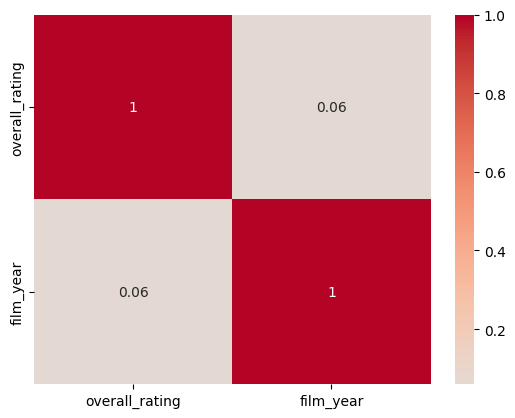

In [25]:
import seaborn as sns
corr = movies[['overall_rating','film_year']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)


There correlation between the year of release and the rating is weak (0.6), suggesting the lack of a linear relationship between the year and the rating across the entire dataset. However, because this is temporal data which can have nuances in relation to specific years, this analysis might not give us the full picture as to whether no relationship between year and ratings exist. Further analysis will  be conducted below with regards to temporal trends to identify whether any relationship exists - at least to some extent - between the rating and the year.

## What is the trend of average film ratings by release year? Analysis and discussion of trends



In [26]:
avg_rating_by_year = movies.groupby('film_year')['overall_rating'].mean().reset_index()
avg_rating_by_year = avg_rating_by_year.sort_values('film_year')
avg_rating_by_year

,film_year,overall_rating
0,1902,3.100000
1,1920,3.100000
2,1921,3.100000
3,1922,3.100000
4,1925,3.200000
...,...,...
98,2021,3.300000
99,2022,3.275000
100,2023,3.330000
101,2024,3.371429


In [27]:
fig = px.line(avg_rating_by_year, x='film_year', y='overall_rating', markers= "point" ,title='Average Rating by Year')
fig.show()

Continuing from the discussion which started in the previous question (is there a correlation between years and ratings?), a very different picture appears from plotting the average rating score for each year. 
In fact, as it is possible to see from the line chart above, for films released between 1900 up until 2004, there is no stable increasing or declining trend, but regular fluctuations on the up or down side. However, for films that were released from 2005 onwards, there is a clear "breakout" from the fluctuation and an upward trend that peaks in 2014, which is the latest available date in our dataset.

This suggest that the correlation conducted in previous question, failed to capture this temporal nuance and the suggestion from this graph is that there might be a bias in rating by which users have rated more recent films higher compared to older films, on average.



## How many "best films of all times" have been released each year and what are the years with the highest count? General discussion on trends

In [28]:
count_by_year = movies.groupby('film_year').size().reset_index(name='count')
fig = px.line(count_by_year, x='film_year', y='count', markers= "point" ,title='Number of Films by Year')
fig.show()

The information contained in this graph provides several interesting insight in relation to this and the previous question. In fact, we can see that the number of films classed as "best of all times" as per the object of the scraping, the number of films released that fit this category from 1900 to 1950 is relatively low, which might suggest a relative infancy of the film industry, not producing as many films as today; or, that there are less "cult films" from that time period in the dataset because very good films from that age might not be known from the curators of the website or the audience; or, as suggested from the previous question, that older films are less appealing to the general audience of users in comparison to newer films.

WHilst it is difficult to provide a response as to what the real reason might be, it is clear that there is a general uptrend in the release of films that have been classes as "best of all times" starting in 1951 and steadily increased over time (with a sharp drop in 1980) to peak sharply in 2008 and reach the maximum in the years 2014 and 2016 when 32 of the films contained in this collection were released. Whilst this might be reflective of a higher rate of films production in modern times than in the past, an audience that prefer recent films over older ones or else, the graph also shows that after the peak in 2016, there is a sharp (almost year-on-year, except for 2017) decline in films released that have made it to this collection, which is even lower than films produced in 1986 (7).

As this downtrend started before Covid, a possible explanation for this can be that the film industry has been extremely politicised over the last few years, with the rise of "woke" sentiment and general politcally correct narratives reflected in modern film production that divide public opinion. Snow White (released in 2025 is a topical [example](https://www.vulture.com/article/disney-snow-white-controversy-timeline.html)). In tandem with that factor, there has also been a rise in interest from the general audience towards TV shows which might also be a reason. In essence, these temporal trends might indicate that audiences are more cautious in chosing "best films of all times" because of all the recent political narratives involved in film production in recent years; the rise of TV shows over films and possibly, also a decrease in the production of films that objectively "leave a mark".

## How are mpaa ratings distributed across the dataset? 

In [29]:
mpaa_categorie_counts = movies['mpaaa_cat'].value_counts()
fig = px.bar(mpaa_categorie_counts, x=mpaa_categorie_counts.index, y=mpaa_categorie_counts.values, title='MPAA Ratings')
fig.update_layout(xaxis_title='MPAA Rating', yaxis_title='Count')
fig.show()

In [30]:
mpaa_ratings_dict

{'G': 'General Audience',
 'PG': 'Parental Guidance Suggested',
 'PG-13': 'Parents Strongly Cautioned',
 'R': 'Restricted',
 'NC-17': 'Adults Only'}

**Response provided in the next question.**

## How have MPAA ratings changed over-time?

In [31]:
mpaa_over_time = movies.groupby(['film_year', 'mpaaa_cat']).size().reset_index(name='count')

In [32]:
mpaa_over_time.sort_values(['film_year', 'count'], ascending=[True, False], inplace=True)

In [33]:
fig = px.line(mpaa_over_time, x='film_year', y='count', color='mpaaa_cat', markers= "point" ,title='MPAA Ratings Over Time', height=600)
fig.update_layout(xaxis_title='Year', yaxis_title='Count')

The graphs above shows a general predominance of Restricted (R) rated films. Particularly from the late 1960 onwards and up to recent times, it is clear that this category of films makes up a large portion of best movies of all times. This is a clear suggestion that films that display thematically strong or controversial themes are, overall, better suited - based on public opinion than lighter films that have, perhaps, more family oriented themes. In fact, as also supported from the barchart in the previous question, even the other predominant categories (Parents Strongly Cautioned and Parental Guidance suggested) are higher across the board compared to films that are suited to a general audience (G-Rated).

In fact, mpaa ratings for General audience (G), are lower across the board in comparison to all the others. And this is the same for "Adults Only" (NC-17), of which only one film features in this dataset and is in 2005 (the graph is interactive, it allows filtering out of classes).

## Which directors appear most frequently in the best movies of all times?

In [35]:
frequent_directors = movies['director'].explode().value_counts().head(20)
fig = px.bar(frequent_directors, x=frequent_directors.index, y=frequent_directors.values, title='Most Frequent Directors')
fig.update_layout(xaxis_title='Director', yaxis_title='Count', xaxis_tickangle= -90)
fig.show()

Among the top 20 directors, the first 5 that appear are widely recognised internationally as having innovated on film-making and the cinema that we know and see today. All the others in the list, are extremely successful and well-known directors, and some of them are still active to this very day (for example Christopher Nolan, Quentin Tarantino, Tim Burton, etc.). As far as directors in the top 3 are concerned, Steven Spielberg counts the highest number of films directed that are on the list of best of all times (17), followed by Scorsese (15), with the third place contended between Hitchcock and Kurosawa (13).

## Are there directors that consistently produce highly rated films?

In [36]:
directors_df_aggr = movies.explode('director').groupby('director').agg({'overall_rating': 'mean', 'film_title': 'count'}).reset_index()
directors_df_to_plot = directors_df_aggr[directors_df_aggr['film_title'] >= 5].sort_values('overall_rating', ascending=False).reset_index(drop=True).head(20)
#The choice of at least 5 films is arbitrary, and it is a value that has been chosen based on the assumption that it is a good number of films to be able to demonstrate consistency in good average rating.
fig = px.bar(directors_df_to_plot, x='director', y='overall_rating', hover_data = 'film_title', color = 'director', title='Directors with Most Films and Highest Average Rating', height=600)
fig.update_layout(xaxis_title='Director', yaxis_title='Average Rating', xaxis_tickangle= -90)
fig.show()

Interestingly, the chart showing the average rating among directors who produced at least 5 films reveals that having the highest number of films produced does not necessarily mean consistently high ratings. In fact, by analysing the barchart produced for this question, Kurosawa and Scorsese rank respectively in 7th and 8th position and they are 3rd and 4th in for the number of films that they directed which made it to this list of best films ever. Spielberg, the one with the most films produced, ranks at 18th position. 

We can see that there are new names at the top and interestingly, Charles Chaplin appears to be the one with the highest average ratings. Cristopher Nolan and Peter Jackson respectively rank second and third. As a general point, it is important to point out that the difference in rating between the first and last one of the graph is marginal so none of this information should say anything negative about the quality of the films produced by any of the directors in this dataset.

## Who are the most recurring actors in the dataset?

In [50]:
actors_df = movies.explode('actors')
actors_df['actors'] = actors_df['actors'].str.strip()
most_recurrent_actors = actors_df['actors'].value_counts().head(20).reset_index() 
most_recurrent_actors.columns = ['actor', 'count']

In [82]:
fig = px.bar(most_recurrent_actors, x= 'actor', y= 'count', color = 'actor', title='Most Frequent Actors')
fig.update_layout(xaxis_title='Actor', yaxis_title='Count', xaxis_tickangle= -90)
fig.show()

## What are the most frequent collaborations of actors in the dataset?

In [80]:
from itertools import combinations

movies_and_actors = movies[['film_title','actors']]
combinations_list = []
for _,row in movies_and_actors.iterrows():
    actors = row['actors']
    if isinstance(actors,list) and len (actors)>1:
        actors_combinations = combinations(sorted(actors),2)
        for comb in actors_combinations:
            combinations_list.append({'actor1': comb[0], 'actor2': comb[1], 'film_title': row['film_title']})

combinations_df = pd.DataFrame(combinations_list)

In [81]:
combinations_df.groupby(['actor1', 'actor2']).size().reset_index(name='count').sort_values('count', ascending=False).head(20)

,actor1,actor2,count
5565,Emma Watson,Rupert Grint,7
5566,Emma Watson,Daniel Radcliffe,6
12978,Rupert Grint,Daniel Radcliffe,6
13472,Takashi Shimura,Toshirô Mifune,5
7492,Ian McKellen,Orlando Bloom,4
8844,Joe Pesci,Robert De Niro,4
9537,Julianne Moore,Philip Seymour Hoffman,4
11421,Michael Caine,Christian Bale,4
11687,Minoru Chiaki,Takashi Shimura,4
11690,Minoru Chiaki,Toshirô Mifune,4


## What are the most successful collaborations of actors in the dataset based on the average rating of the films they feature in?